# Matplotlib Add-Ons and Other Advanced Functions

We'll now explore some of the add-ons and other advanced features of Matplotlib

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d

## Three-Dimensional Plotting in Matplotlib
Matplotlib was initially designed with only two-dimensional plotting in mind. Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization. three-dimensional plots are enabled by importing the ```mplot3d``` toolkit, included with the main Matplotlib installation.

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ```projection='3d'``` to any of the normal axes creation routines.

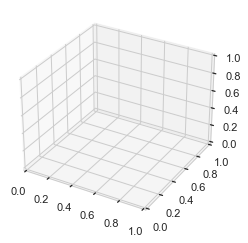

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use ```%matplotlib notebook``` rather than ```%matplotlib inline``` when running this code.

### Three-dimensional Points and Lines
The most basic three-dimensional plot is a line or collection of scatter plots created from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ```ax.plot3D``` and ```ax.scatter3D``` functions. The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to earlier tutorials for more information on controlling the output. Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line.

<IPython.core.display.Javascript object>


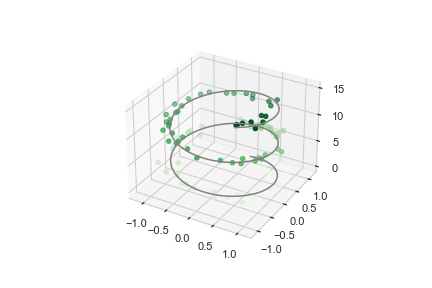

In [7]:
%matplotlib notebook
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

### Three-dimensional Contour Plots
Analogous to two-dimensional contour plots, mplot3d contains tools to create three-dimensional relief plots using the same inputs. Like two-dimensional ```ax.contour``` plots (see Matplotlib documentation for details on this plot function), ```ax.contour3D``` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function.

<IPython.core.display.Javascript object>


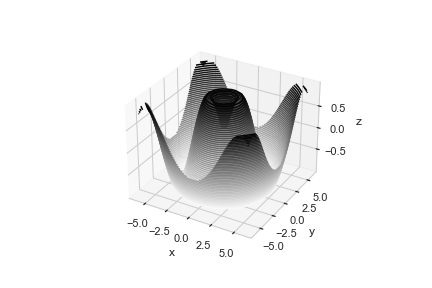

In [8]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Visualization with Seaborn
Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired. There are several valid complaints about Matplotlib that often come up:
- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ```DataFrames```. In order to visualize data from a Pandas ```DataFrame```, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ```DataFrame``` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ```DataFrames```.

### Seaborn versus Matplotlib
Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors. We start with the typical imports.

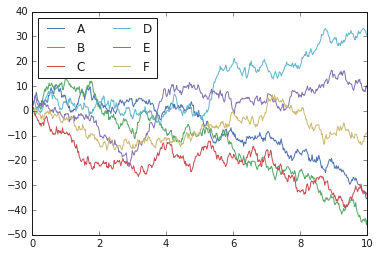

In [9]:
plt.style.use('classic')
%matplotlib inline

# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. 

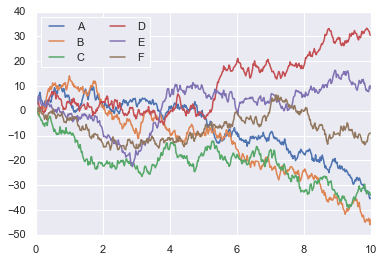

In [10]:
import seaborn as sns
sns.set()

# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Histograms, kernal density estimation, and densities

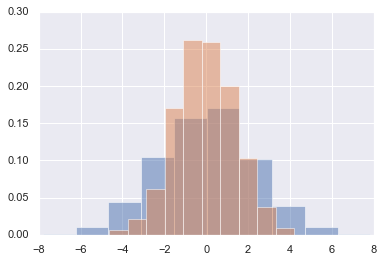

In [11]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ```sns.kdeplot```.

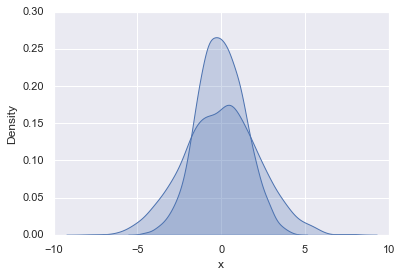

In [12]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ```distplot```.

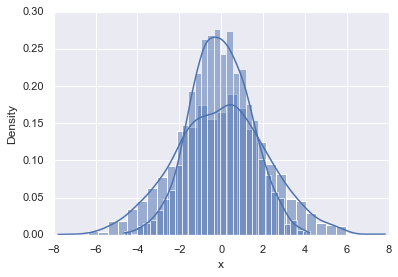

In [13]:
sns.histplot(data['x'],kde=True, stat="density")
sns.histplot(data['y'],kde=True, stat="density");

### Example: Exploring Marathon Finishing Times
Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon. We'll use data scraped by Jake VanderPlas from sources on the Web - he aggregated and removed any identifying information. By default, Pandas will load the time columns as Python strings (type ```object```). Let's fix this by providing a converter for the times.

In [14]:
from datetime import timedelta

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('../Data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds.

In [15]:
data['split_sec'] = data['split'].view(np.int64) / 1e9
data['final_sec'] = data['final'].view(np.int64) / 1e9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


To get an idea of what the data looks like, we can plot a ```jointplot``` over the data.

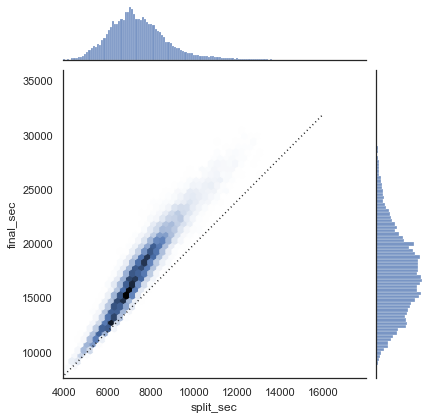

In [16]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon. If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race.

In [17]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction. Let's do a distribution plot of this split fraction.

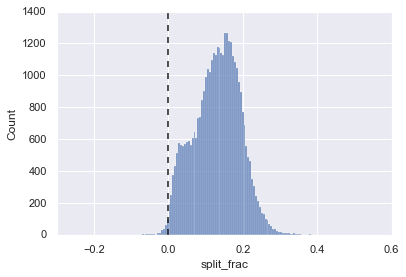

In [18]:
sns.histplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [19]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a ```pairgrid```, which draws plots of all these correlations.

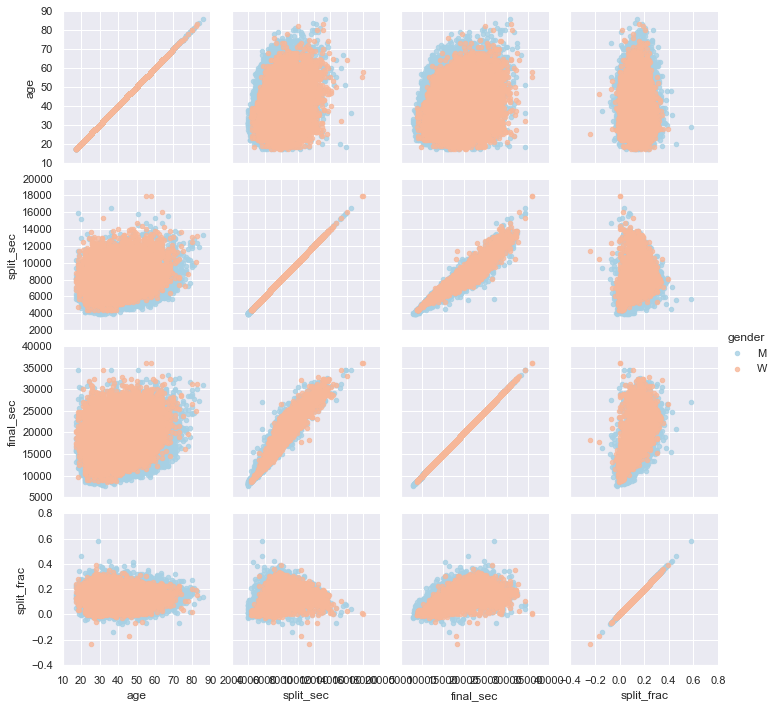

In [20]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time. (We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. However, because the output is a simple Matplotlib plot, Matplotlib functions can be used to adjust the ticks, if desired.)

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups.

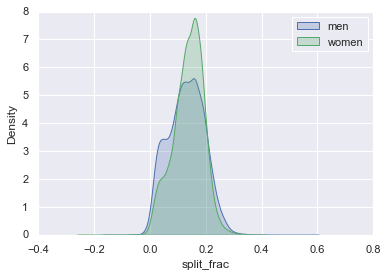

In [21]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True, color='b')
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True, color='g')
plt.xlabel('split_frac');
plt.legend()

The interesting thing here is that there are more men than women who are running close to an even split. This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a violin plot.

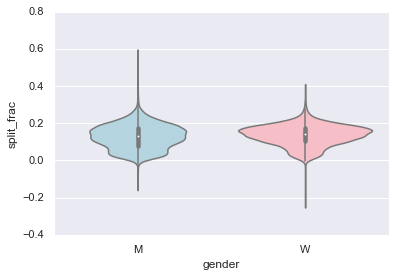

In [22]:
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"]);

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decadal age for each person.

In [23]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


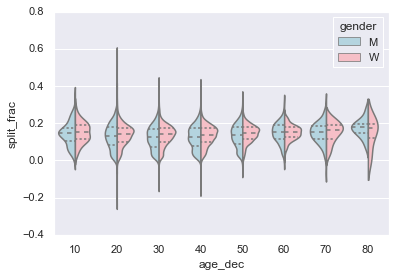

In [24]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range.

In [25]:
(data.age > 80).sum()

7

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use ```regplot```, which will automatically fit a linear regression to the data.

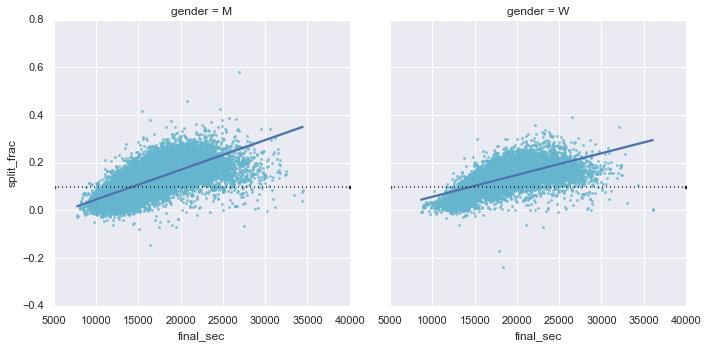

In [26]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":"); # add a horizontal line to define a split_fract threshold at 0.1

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.

## Geographic Data with Basemap

One common type of visualization in data science is that of geographic data. Matplotlib's main tool for this type of visualization is the Basemap toolkit, which is one of several Matplotlib toolkits which lives under the ```mpl_toolkits``` namespace.

We'll use BaseMape to re-examine the California cities dataset from the previous tutorial.

In [27]:
from mpl_toolkits.basemap import Basemap # You'll need to use conda install -c conda-forge basemap to install this add-on. Also, conda install -c conda-forge basemap-data-hires


cities = pd.read_csv('../Data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

Next, we set up the map projection, scatter the data, and then create a colorbar and legend. The first thing to decide when using maps is what projection to use. 

It is impossible to project a spherical map, such as that of the Earth, onto a flat surface without somehow distorting it or breaking its continuity. Projections have been developed over the course of human history, and there are a lot of choices! Depending on the intended use of the map projection, there are certain map features (e.g., direction, area, distance, shape, or other considerations) that are useful to maintain.

The Basemap package implements several dozen such projections, all referenced by a short format code. 

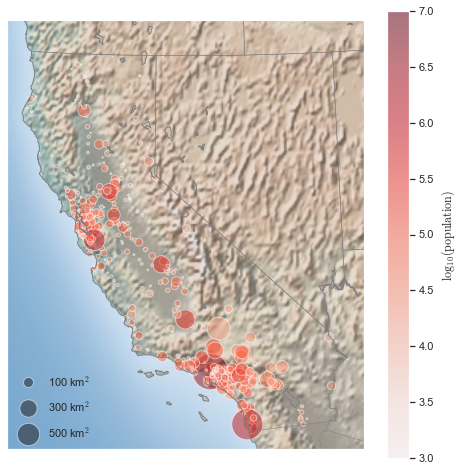

In [29]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1e6, height=1.2e6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

This shows us roughly where larger populations of people have settled in California: they are clustered near the coast in the Los Angeles and San Francisco areas, stretched along the highways in the flat central valley, and avoiding almost completely the mountainous regions along the borders of the state.